# Keystroke Dynamics

### Dataset:
The dataset is taken from http://www.vmonaco.com/keystroke-datasets.
Specifically from https://ms.sapientia.ro/~manyi/keystroke.html.

### To read:
* https://appliedmachinelearning.blog/2017/07/26/user-verification-based-on-keystroke-dynamics-python-code/

## 1. Loading data

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [2]:
data = arff.loadarff('dataset2_norm.arff')
df = pd.DataFrame(data[0])

In [3]:
df.columns

Index(['holdtime1', 'holdtime2', 'holdtime3', 'holdtime4', 'holdtime5',
       'holdtime6', 'holdtime7', 'holdtime8', 'holdtime9', 'holdtime10',
       'holdtime11', 'holdtime12', 'holdtime13', 'holdtime14', 'downdown1',
       'downdown2', 'downdown3', 'downdown4', 'downdown5', 'downdown6',
       'downdown7', 'downdown8', 'downdown9', 'downdown10', 'downdown11',
       'downdown12', 'downdown13', 'updown1', 'updown2', 'updown3', 'updown4',
       'updown5', 'updown6', 'updown7', 'updown8', 'updown9', 'updown10',
       'updown11', 'updown12', 'updown13', 'pressure1', 'pressure2',
       'pressure3', 'pressure4', 'pressure5', 'pressure6', 'pressure7',
       'pressure8', 'pressure9', 'pressure10', 'pressure11', 'pressure12',
       'pressure13', 'pressure14', 'fingerarea1', 'fingerarea2', 'fingerarea3',
       'fingerarea4', 'fingerarea5', 'fingerarea6', 'fingerarea7',
       'fingerarea8', 'fingerarea9', 'fingerarea10', 'fingerarea11',
       'fingerarea12', 'fingerarea13', 'fingerar

In [4]:
len(df.columns)

72

In [5]:
df.shape

(2142, 72)

In [6]:
a = df['user_id'].values[:]

In [7]:
type(a)

numpy.ndarray

In [8]:
df.head()

,holdtime1,holdtime2,holdtime3,holdtime4,holdtime5,holdtime6,holdtime7,holdtime8,holdtime9,holdtime10,...,fingerarea9,fingerarea10,fingerarea11,fingerarea12,fingerarea13,fingerarea14,meanholdtime,meanpressure,meanfingerarea,user_id
0,0.538793,0.462222,0.362903,0.274510,0.300366,0.384259,0.430147,0.467290,0.240,0.374429,...,0.296296,0.296296,0.222222,0.211470,0.283154,0.185185,0.447030,0.387546,0.364089,b'1'
1,0.435345,0.382222,0.354839,0.285714,0.106227,0.328704,0.363971,0.485981,0.344,0.365297,...,0.259259,0.185185,0.185185,0.354839,0.211470,0.148148,0.423762,0.445704,0.369322,b'1'
2,0.478448,0.453333,0.399194,0.338936,0.340659,0.375000,0.338235,0.345794,0.296,0.365297,...,0.296296,0.333333,0.222222,0.283154,0.175627,0.185185,0.454455,0.464092,0.371658,b'1'
3,0.396552,0.444444,0.415323,0.338936,0.366300,0.416667,0.404412,0.640187,0.276,0.410959,...,0.370370,0.185185,0.222222,0.283154,0.247312,0.296296,0.522772,0.397230,0.396828,b'1'
4,0.469828,0.453333,0.290323,0.271709,0.340659,0.361111,0.408088,0.635514,0.324,0.378995,...,0.333333,0.222222,0.222222,0.211470,0.318996,0.074074,0.493564,0.455577,0.365646,b'1'


In [9]:
b = np.mean(a == b'37')

In [10]:
2142 * b

51.0

> As it can be seen the number of samples per user are 51. Since the user are 42 users, there in total 51 * 42 = 2142 samples. Number of features is 71.

### Note: the dataset is 2142 * 72.

## 2. Preprocessing 

Good source for Pandas: https://chrisalbon.com/python/data_wrangling/pandas_replace_values/

In [11]:
user_id_unique = df['user_id'].unique()

In [12]:
user_id_unique

array([b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9', b'10', b'20',
       b'21', b'24', b'25', b'26', b'27', b'28', b'29', b'35', b'36',
       b'37', b'38', b'40', b'41', b'50', b'51', b'53', b'54', b'55',
       b'65', b'66', b'68', b'69', b'70', b'71', b'73', b'80', b'81',
       b'82', b'83', b'84', b'85'], dtype=object)

In [13]:
user_id_unique.shape

(42,)

In [14]:
type(user_id_unique)

numpy.ndarray

In [15]:
user_id = df['user_id'].values

In [16]:
user_id.shape

(2142,)

In [17]:
"""
user_id[user_id == b'20'] = b'11'
user_id[user_id == b'21'] = b'12'
user_id[user_id == b'24'] = b'13'
user_id[user_id == b'25'] = b'14'
user_id[user_id == b'26'] = b'15'
user_id[user_id == b'27'] = b'16'
user_id[user_id == b'28'] = b'17'
user_id[user_id == b'29'] = b'18'
user_id[user_id == b'35'] = b'19'
user_id[user_id == b'35'] = b'20'
user_id[user_id == b'37'] = b'21'
user_id[user_id == b'38'] = b'22'
user_id[user_id == b'20'] = b'11'
"""

"\nuser_id[user_id == b'20'] = b'11'\nuser_id[user_id == b'21'] = b'12'\nuser_id[user_id == b'24'] = b'13'\nuser_id[user_id == b'25'] = b'14'\nuser_id[user_id == b'26'] = b'15'\nuser_id[user_id == b'27'] = b'16'\nuser_id[user_id == b'28'] = b'17'\nuser_id[user_id == b'29'] = b'18'\nuser_id[user_id == b'35'] = b'19'\nuser_id[user_id == b'35'] = b'20'\nuser_id[user_id == b'37'] = b'21'\nuser_id[user_id == b'38'] = b'22'\nuser_id[user_id == b'20'] = b'11'\n"

### 2.0.1 Creating Labels (Y)

In [18]:
%time
label = []
for i in range(42):
    for j in range(51):
        label.append(i)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [19]:
y = np.array(label)

In [20]:
y.shape

(2142,)

In [21]:
np.mean(y == 0) * 2142

51.0

In [22]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

### 2.0.2 Input Data (X)

In [28]:
df_x = df.iloc[:,:71]

In [29]:
df_x.head()

,holdtime1,holdtime2,holdtime3,holdtime4,holdtime5,holdtime6,holdtime7,holdtime8,holdtime9,holdtime10,...,fingerarea8,fingerarea9,fingerarea10,fingerarea11,fingerarea12,fingerarea13,fingerarea14,meanholdtime,meanpressure,meanfingerarea
0,0.538793,0.462222,0.362903,0.274510,0.300366,0.384259,0.430147,0.467290,0.240,0.374429,...,0.222222,0.296296,0.296296,0.222222,0.211470,0.283154,0.185185,0.447030,0.387546,0.364089
1,0.435345,0.382222,0.354839,0.285714,0.106227,0.328704,0.363971,0.485981,0.344,0.365297,...,0.185185,0.259259,0.185185,0.185185,0.354839,0.211470,0.148148,0.423762,0.445704,0.369322
2,0.478448,0.453333,0.399194,0.338936,0.340659,0.375000,0.338235,0.345794,0.296,0.365297,...,0.259259,0.296296,0.333333,0.222222,0.283154,0.175627,0.185185,0.454455,0.464092,0.371658
3,0.396552,0.444444,0.415323,0.338936,0.366300,0.416667,0.404412,0.640187,0.276,0.410959,...,0.296296,0.370370,0.185185,0.222222,0.283154,0.247312,0.296296,0.522772,0.397230,0.396828
4,0.469828,0.453333,0.290323,0.271709,0.340659,0.361111,0.408088,0.635514,0.324,0.378995,...,0.296296,0.333333,0.222222,0.222222,0.211470,0.318996,0.074074,0.493564,0.455577,0.365646


In [27]:
X = df_x.values

In [73]:
X.shape

(2142, 71)

### 2.1 One Hot Encoding

Source: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

In [74]:
from keras.utils import to_categorical

In [75]:
Y = to_categorical(y)

In [76]:
Y.shape

(2142, 42)

In [77]:
Y[51].shape

(42,)

### 2.2 Splitting the dataset into the Training and Testing

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [80]:
X_train.shape

(1713, 71)

In [81]:
2142 * 0.8

1713.6000000000001

In [82]:
Y_train.shape

(1713, 42)

In [83]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

As it can be seen, train_test_split splits the data randomly.

## 3. Building Logistic Regression with Keras

In [84]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.regularizers import L1L2

In [85]:
#Initializing Neural Network
model = Sequential()

In [86]:
# Adding the input layer and the first hidden layer
model.add(Dense(units = 42, 
                input_dim = 71, 
                activation = 'softmax',
                #kernel_regularizer = L1L2(l1=0.0, l2=0.1)
               ))

In [87]:
#Print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 42)                3024      
Total params: 3,024
Trainable params: 3,024
Non-trainable params: 0
_________________________________________________________________


### 3.1 Compilation

In [88]:
from keras import optimizers

In [89]:
#adam = optimizers.Adam(lr = 0.001)

In [90]:
# Compiling Neural Network
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

### 3.2 Training

In [91]:
#Early Stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

In [92]:
# checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', 
#                              #verbose=1, 
#                              monitor='val_acc',
#                              save_best_only=True, 
#                              mode='auto')

In [93]:
rd = ReduceLROnPlateau(patience = 20, factor  = 0.8, monitor='val_acc')

In [94]:
es = EarlyStopping(monitor = 'val_loss', 
                   mode = 'auto', 
                   patience=50, 
                   restore_best_weights = True)

In [95]:
%time
train_history = model.fit(X_train, Y_train, 
                          batch_size = 100, 
                          epochs = 2000, 
                          verbose = 2,
                          validation_split = 0.2,
                          callbacks = [rd]
                         )

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
Train on 1370 samples, validate on 343 samples
Epoch 1/2000
 - 0s - loss: 3.7850 - acc: 0.0241 - val_loss: 3.7557 - val_acc: 0.0379
Epoch 2/2000
 - 0s - loss: 3.7386 - acc: 0.0328 - val_loss: 3.7231 - val_acc: 0.0204
Epoch 3/2000
 - 0s - loss: 3.7035 - acc: 0.0372 - val_loss: 3.6987 - val_acc: 0.0408
Epoch 4/2000
 - 0s - loss: 3.6767 - acc: 0.0569 - val_loss: 3.6778 - val_acc: 0.0496
Epoch 5/2000
 - 0s - loss: 3.6534 - acc: 0.0766 - val_loss: 3.6602 - val_acc: 0.0525
Epoch 6/2000
 - 0s - loss: 3.6334 - acc: 0.0752 - val_loss: 3.6443 - val_acc: 0.0466
Epoch 7/2000
 - 0s - loss: 3.6148 - acc: 0.0737 - val_loss: 3.6287 - val_acc: 0.0408
Epoch 8/2000
 - 0s - loss: 3.5973 - acc: 0.0715 - val_loss: 3.6139 - val_acc: 0.0408
Epoch 9/2000
 - 0s - loss: 3.5804 - acc: 0.0693 - val_loss: 3.5978 - val_acc: 0.0350
Epoch 10/2000
 - 0s - loss: 3.5639 - acc: 0.0737 - val_loss: 3.5833 - val_acc: 0.0408
Epoch 11/2000
 - 0s - loss: 3.5477 - a

 - 0s - loss: 2.5701 - acc: 0.6803 - val_loss: 2.6477 - val_acc: 0.5977
Epoch 96/2000
 - 0s - loss: 2.5622 - acc: 0.6752 - val_loss: 2.6401 - val_acc: 0.5948
Epoch 97/2000
 - 0s - loss: 2.5534 - acc: 0.6796 - val_loss: 2.6324 - val_acc: 0.6035
Epoch 98/2000
 - 0s - loss: 2.5447 - acc: 0.6788 - val_loss: 2.6256 - val_acc: 0.6006
Epoch 99/2000
 - 0s - loss: 2.5371 - acc: 0.6825 - val_loss: 2.6167 - val_acc: 0.6152
Epoch 100/2000
 - 0s - loss: 2.5291 - acc: 0.6818 - val_loss: 2.6101 - val_acc: 0.6064
Epoch 101/2000
 - 0s - loss: 2.5206 - acc: 0.6898 - val_loss: 2.6019 - val_acc: 0.6152
Epoch 102/2000
 - 0s - loss: 2.5130 - acc: 0.6971 - val_loss: 2.5949 - val_acc: 0.6122
Epoch 103/2000
 - 0s - loss: 2.5045 - acc: 0.7022 - val_loss: 2.5861 - val_acc: 0.6268
Epoch 104/2000
 - 0s - loss: 2.4965 - acc: 0.7066 - val_loss: 2.5794 - val_acc: 0.6239
Epoch 105/2000
 - 0s - loss: 2.4886 - acc: 0.7095 - val_loss: 2.5715 - val_acc: 0.6268
Epoch 106/2000
 - 0s - loss: 2.4805 - acc: 0.7109 - val_loss: 

Epoch 190/2000
 - 0s - loss: 1.9556 - acc: 0.8401 - val_loss: 2.0786 - val_acc: 0.7230
Epoch 191/2000
 - 0s - loss: 1.9505 - acc: 0.8423 - val_loss: 2.0733 - val_acc: 0.7230
Epoch 192/2000
 - 0s - loss: 1.9457 - acc: 0.8387 - val_loss: 2.0690 - val_acc: 0.7259
Epoch 193/2000
 - 0s - loss: 1.9406 - acc: 0.8358 - val_loss: 2.0646 - val_acc: 0.7318
Epoch 194/2000
 - 0s - loss: 1.9354 - acc: 0.8380 - val_loss: 2.0596 - val_acc: 0.7289
Epoch 195/2000
 - 0s - loss: 1.9308 - acc: 0.8401 - val_loss: 2.0560 - val_acc: 0.7259
Epoch 196/2000
 - 0s - loss: 1.9263 - acc: 0.8394 - val_loss: 2.0515 - val_acc: 0.7289
Epoch 197/2000
 - 0s - loss: 1.9213 - acc: 0.8372 - val_loss: 2.0469 - val_acc: 0.7259
Epoch 198/2000
 - 0s - loss: 1.9164 - acc: 0.8416 - val_loss: 2.0427 - val_acc: 0.7230
Epoch 199/2000
 - 0s - loss: 1.9117 - acc: 0.8467 - val_loss: 2.0379 - val_acc: 0.7347
Epoch 200/2000
 - 0s - loss: 1.9065 - acc: 0.8431 - val_loss: 2.0338 - val_acc: 0.7347
Epoch 201/2000
 - 0s - loss: 1.9020 - acc: 

 - 0s - loss: 1.5684 - acc: 0.8723 - val_loss: 1.7255 - val_acc: 0.7843
Epoch 285/2000
 - 0s - loss: 1.5650 - acc: 0.8730 - val_loss: 1.7229 - val_acc: 0.7813
Epoch 286/2000
 - 0s - loss: 1.5624 - acc: 0.8715 - val_loss: 1.7212 - val_acc: 0.7872
Epoch 287/2000
 - 0s - loss: 1.5599 - acc: 0.8737 - val_loss: 1.7181 - val_acc: 0.7872
Epoch 288/2000
 - 0s - loss: 1.5571 - acc: 0.8759 - val_loss: 1.7158 - val_acc: 0.7813
Epoch 289/2000
 - 0s - loss: 1.5543 - acc: 0.8752 - val_loss: 1.7142 - val_acc: 0.7843
Epoch 290/2000
 - 0s - loss: 1.5517 - acc: 0.8737 - val_loss: 1.7109 - val_acc: 0.7843
Epoch 291/2000
 - 0s - loss: 1.5490 - acc: 0.8752 - val_loss: 1.7090 - val_acc: 0.7843
Epoch 292/2000
 - 0s - loss: 1.5463 - acc: 0.8752 - val_loss: 1.7066 - val_acc: 0.7813
Epoch 293/2000
 - 0s - loss: 1.5442 - acc: 0.8737 - val_loss: 1.7036 - val_acc: 0.7872
Epoch 294/2000
 - 0s - loss: 1.5409 - acc: 0.8730 - val_loss: 1.7020 - val_acc: 0.7872
Epoch 295/2000
 - 0s - loss: 1.5383 - acc: 0.8737 - val_lo

Epoch 379/2000
 - 0s - loss: 1.3697 - acc: 0.8861 - val_loss: 1.5492 - val_acc: 0.7959
Epoch 380/2000
 - 0s - loss: 1.3686 - acc: 0.8876 - val_loss: 1.5477 - val_acc: 0.7930
Epoch 381/2000
 - 0s - loss: 1.3676 - acc: 0.8869 - val_loss: 1.5468 - val_acc: 0.7930
Epoch 382/2000
 - 0s - loss: 1.3662 - acc: 0.8869 - val_loss: 1.5461 - val_acc: 0.7988
Epoch 383/2000
 - 0s - loss: 1.3654 - acc: 0.8883 - val_loss: 1.5453 - val_acc: 0.7959
Epoch 384/2000
 - 0s - loss: 1.3641 - acc: 0.8883 - val_loss: 1.5443 - val_acc: 0.7959
Epoch 385/2000
 - 0s - loss: 1.3630 - acc: 0.8898 - val_loss: 1.5432 - val_acc: 0.7988
Epoch 386/2000
 - 0s - loss: 1.3618 - acc: 0.8898 - val_loss: 1.5422 - val_acc: 0.7988
Epoch 387/2000
 - 0s - loss: 1.3607 - acc: 0.8891 - val_loss: 1.5412 - val_acc: 0.7959
Epoch 388/2000
 - 0s - loss: 1.3595 - acc: 0.8898 - val_loss: 1.5401 - val_acc: 0.7959
Epoch 389/2000
 - 0s - loss: 1.3585 - acc: 0.8898 - val_loss: 1.5392 - val_acc: 0.7959
Epoch 390/2000
 - 0s - loss: 1.3574 - acc: 

 - 0s - loss: 1.2873 - acc: 0.8942 - val_loss: 1.4768 - val_acc: 0.8047
Epoch 474/2000
 - 0s - loss: 1.2869 - acc: 0.8942 - val_loss: 1.4759 - val_acc: 0.8076
Epoch 475/2000
 - 0s - loss: 1.2863 - acc: 0.8942 - val_loss: 1.4755 - val_acc: 0.8076
Epoch 476/2000
 - 0s - loss: 1.2858 - acc: 0.8934 - val_loss: 1.4752 - val_acc: 0.8076
Epoch 477/2000
 - 0s - loss: 1.2853 - acc: 0.8942 - val_loss: 1.4747 - val_acc: 0.8017
Epoch 478/2000
 - 0s - loss: 1.2847 - acc: 0.8942 - val_loss: 1.4744 - val_acc: 0.8047
Epoch 479/2000
 - 0s - loss: 1.2842 - acc: 0.8942 - val_loss: 1.4736 - val_acc: 0.8047
Epoch 480/2000
 - 0s - loss: 1.2837 - acc: 0.8934 - val_loss: 1.4731 - val_acc: 0.8017
Epoch 481/2000
 - 0s - loss: 1.2831 - acc: 0.8934 - val_loss: 1.4728 - val_acc: 0.8017
Epoch 482/2000
 - 0s - loss: 1.2826 - acc: 0.8942 - val_loss: 1.4721 - val_acc: 0.8017
Epoch 483/2000
 - 0s - loss: 1.2820 - acc: 0.8934 - val_loss: 1.4719 - val_acc: 0.8017
Epoch 484/2000
 - 0s - loss: 1.2815 - acc: 0.8927 - val_lo

Epoch 568/2000
 - 0s - loss: 1.2509 - acc: 0.8949 - val_loss: 1.4445 - val_acc: 0.8105
Epoch 569/2000
 - 0s - loss: 1.2506 - acc: 0.8949 - val_loss: 1.4442 - val_acc: 0.8134
Epoch 570/2000
 - 0s - loss: 1.2504 - acc: 0.8949 - val_loss: 1.4439 - val_acc: 0.8105
Epoch 571/2000
 - 0s - loss: 1.2501 - acc: 0.8949 - val_loss: 1.4436 - val_acc: 0.8134
Epoch 572/2000
 - 0s - loss: 1.2499 - acc: 0.8949 - val_loss: 1.4435 - val_acc: 0.8134
Epoch 573/2000
 - 0s - loss: 1.2496 - acc: 0.8942 - val_loss: 1.4432 - val_acc: 0.8134
Epoch 574/2000
 - 0s - loss: 1.2493 - acc: 0.8942 - val_loss: 1.4429 - val_acc: 0.8134
Epoch 575/2000
 - 0s - loss: 1.2490 - acc: 0.8949 - val_loss: 1.4428 - val_acc: 0.8163
Epoch 576/2000
 - 0s - loss: 1.2488 - acc: 0.8949 - val_loss: 1.4426 - val_acc: 0.8105
Epoch 577/2000
 - 0s - loss: 1.2485 - acc: 0.8949 - val_loss: 1.4423 - val_acc: 0.8163
Epoch 578/2000
 - 0s - loss: 1.2482 - acc: 0.8942 - val_loss: 1.4421 - val_acc: 0.8134
Epoch 579/2000
 - 0s - loss: 1.2480 - acc: 

 - 0s - loss: 1.2343 - acc: 0.8949 - val_loss: 1.4299 - val_acc: 0.8222
Epoch 663/2000
 - 0s - loss: 1.2342 - acc: 0.8949 - val_loss: 1.4298 - val_acc: 0.8192
Epoch 664/2000
 - 0s - loss: 1.2341 - acc: 0.8949 - val_loss: 1.4298 - val_acc: 0.8192
Epoch 665/2000
 - 0s - loss: 1.2339 - acc: 0.8949 - val_loss: 1.4296 - val_acc: 0.8192
Epoch 666/2000
 - 0s - loss: 1.2338 - acc: 0.8949 - val_loss: 1.4296 - val_acc: 0.8192
Epoch 667/2000
 - 0s - loss: 1.2337 - acc: 0.8949 - val_loss: 1.4295 - val_acc: 0.8192
Epoch 668/2000
 - 0s - loss: 1.2336 - acc: 0.8949 - val_loss: 1.4294 - val_acc: 0.8192
Epoch 669/2000
 - 0s - loss: 1.2335 - acc: 0.8949 - val_loss: 1.4293 - val_acc: 0.8222
Epoch 670/2000
 - 0s - loss: 1.2335 - acc: 0.8949 - val_loss: 1.4292 - val_acc: 0.8192
Epoch 671/2000
 - 0s - loss: 1.2334 - acc: 0.8949 - val_loss: 1.4291 - val_acc: 0.8192
Epoch 672/2000
 - 0s - loss: 1.2333 - acc: 0.8956 - val_loss: 1.4291 - val_acc: 0.8192
Epoch 673/2000
 - 0s - loss: 1.2332 - acc: 0.8956 - val_lo

Epoch 757/2000
 - 0s - loss: 1.2282 - acc: 0.8956 - val_loss: 1.4247 - val_acc: 0.8222
Epoch 758/2000
 - 0s - loss: 1.2282 - acc: 0.8956 - val_loss: 1.4247 - val_acc: 0.8222
Epoch 759/2000
 - 0s - loss: 1.2282 - acc: 0.8956 - val_loss: 1.4246 - val_acc: 0.8222
Epoch 760/2000
 - 0s - loss: 1.2281 - acc: 0.8956 - val_loss: 1.4246 - val_acc: 0.8222
Epoch 761/2000
 - 0s - loss: 1.2281 - acc: 0.8956 - val_loss: 1.4246 - val_acc: 0.8222
Epoch 762/2000
 - 0s - loss: 1.2281 - acc: 0.8956 - val_loss: 1.4245 - val_acc: 0.8222
Epoch 763/2000
 - 0s - loss: 1.2280 - acc: 0.8956 - val_loss: 1.4245 - val_acc: 0.8222
Epoch 764/2000
 - 0s - loss: 1.2280 - acc: 0.8956 - val_loss: 1.4245 - val_acc: 0.8222
Epoch 765/2000
 - 0s - loss: 1.2280 - acc: 0.8956 - val_loss: 1.4245 - val_acc: 0.8222
Epoch 766/2000
 - 0s - loss: 1.2279 - acc: 0.8956 - val_loss: 1.4244 - val_acc: 0.8222
Epoch 767/2000
 - 0s - loss: 1.2279 - acc: 0.8956 - val_loss: 1.4244 - val_acc: 0.8222
Epoch 768/2000
 - 0s - loss: 1.2279 - acc: 

 - 0s - loss: 1.2262 - acc: 0.8956 - val_loss: 1.4229 - val_acc: 0.8222
Epoch 852/2000
 - 0s - loss: 1.2261 - acc: 0.8956 - val_loss: 1.4229 - val_acc: 0.8222
Epoch 853/2000
 - 0s - loss: 1.2261 - acc: 0.8956 - val_loss: 1.4229 - val_acc: 0.8222
Epoch 854/2000
 - 0s - loss: 1.2261 - acc: 0.8956 - val_loss: 1.4229 - val_acc: 0.8222
Epoch 855/2000
 - 0s - loss: 1.2261 - acc: 0.8956 - val_loss: 1.4228 - val_acc: 0.8222
Epoch 856/2000
 - 0s - loss: 1.2261 - acc: 0.8956 - val_loss: 1.4228 - val_acc: 0.8222
Epoch 857/2000
 - 0s - loss: 1.2261 - acc: 0.8956 - val_loss: 1.4228 - val_acc: 0.8222
Epoch 858/2000
 - 0s - loss: 1.2261 - acc: 0.8956 - val_loss: 1.4228 - val_acc: 0.8222
Epoch 859/2000
 - 0s - loss: 1.2261 - acc: 0.8956 - val_loss: 1.4228 - val_acc: 0.8222
Epoch 860/2000
 - 0s - loss: 1.2261 - acc: 0.8956 - val_loss: 1.4228 - val_acc: 0.8222
Epoch 861/2000
 - 0s - loss: 1.2260 - acc: 0.8956 - val_loss: 1.4228 - val_acc: 0.8222
Epoch 862/2000
 - 0s - loss: 1.2260 - acc: 0.8956 - val_lo

Epoch 946/2000
 - 0s - loss: 1.2254 - acc: 0.8956 - val_loss: 1.4222 - val_acc: 0.8222
Epoch 947/2000
 - 0s - loss: 1.2254 - acc: 0.8956 - val_loss: 1.4222 - val_acc: 0.8222
Epoch 948/2000
 - 0s - loss: 1.2254 - acc: 0.8956 - val_loss: 1.4222 - val_acc: 0.8222
Epoch 949/2000
 - 0s - loss: 1.2254 - acc: 0.8956 - val_loss: 1.4222 - val_acc: 0.8222
Epoch 950/2000
 - 0s - loss: 1.2254 - acc: 0.8956 - val_loss: 1.4222 - val_acc: 0.8222
Epoch 951/2000
 - 0s - loss: 1.2254 - acc: 0.8956 - val_loss: 1.4222 - val_acc: 0.8222
Epoch 952/2000
 - 0s - loss: 1.2254 - acc: 0.8956 - val_loss: 1.4222 - val_acc: 0.8222
Epoch 953/2000
 - 0s - loss: 1.2254 - acc: 0.8956 - val_loss: 1.4222 - val_acc: 0.8222
Epoch 954/2000
 - 0s - loss: 1.2254 - acc: 0.8956 - val_loss: 1.4222 - val_acc: 0.8222
Epoch 955/2000
 - 0s - loss: 1.2254 - acc: 0.8956 - val_loss: 1.4222 - val_acc: 0.8222
Epoch 956/2000
 - 0s - loss: 1.2254 - acc: 0.8956 - val_loss: 1.4222 - val_acc: 0.8222
Epoch 957/2000
 - 0s - loss: 1.2254 - acc: 

Epoch 1040/2000
 - 0s - loss: 1.2252 - acc: 0.8956 - val_loss: 1.4220 - val_acc: 0.8222
Epoch 1041/2000
 - 0s - loss: 1.2252 - acc: 0.8956 - val_loss: 1.4220 - val_acc: 0.8222
Epoch 1042/2000
 - 0s - loss: 1.2252 - acc: 0.8956 - val_loss: 1.4220 - val_acc: 0.8222
Epoch 1043/2000
 - 0s - loss: 1.2252 - acc: 0.8956 - val_loss: 1.4220 - val_acc: 0.8222
Epoch 1044/2000
 - 0s - loss: 1.2252 - acc: 0.8956 - val_loss: 1.4220 - val_acc: 0.8222
Epoch 1045/2000
 - 0s - loss: 1.2252 - acc: 0.8956 - val_loss: 1.4220 - val_acc: 0.8222
Epoch 1046/2000
 - 0s - loss: 1.2252 - acc: 0.8956 - val_loss: 1.4220 - val_acc: 0.8222
Epoch 1047/2000
 - 0s - loss: 1.2252 - acc: 0.8956 - val_loss: 1.4220 - val_acc: 0.8222
Epoch 1048/2000
 - 0s - loss: 1.2252 - acc: 0.8956 - val_loss: 1.4220 - val_acc: 0.8222
Epoch 1049/2000
 - 0s - loss: 1.2252 - acc: 0.8956 - val_loss: 1.4220 - val_acc: 0.8222
Epoch 1050/2000
 - 0s - loss: 1.2252 - acc: 0.8956 - val_loss: 1.4220 - val_acc: 0.8222
Epoch 1051/2000
 - 0s - loss: 1.

Epoch 1134/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1135/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1136/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1137/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1138/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1139/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1140/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1141/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1142/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1143/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1144/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1145/2000
 - 0s - loss: 1.

 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1228/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1229/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1230/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1231/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1232/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1233/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1234/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1235/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1236/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1237/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1238/2000
 - 0s - loss: 1.2251 - acc: 0.89

Epoch 1321/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1322/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1323/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1324/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1325/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1326/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1327/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1328/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1329/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1330/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1331/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1332/2000
 - 0s - loss: 1.

 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1415/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1416/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1417/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1418/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1419/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1420/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1421/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1422/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1423/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1424/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1425/2000
 - 0s - loss: 1.2251 - acc: 0.89

Epoch 1508/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1509/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1510/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1511/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1512/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1513/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1514/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1515/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1516/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1517/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1518/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1519/2000
 - 0s - loss: 1.

 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1602/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1603/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1604/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1605/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1606/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1607/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1608/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1609/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1610/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1611/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1612/2000
 - 0s - loss: 1.2251 - acc: 0.89

Epoch 1695/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1696/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1697/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1698/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1699/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1700/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1701/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1702/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1703/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1704/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1705/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1706/2000
 - 0s - loss: 1.

 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1789/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1790/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1791/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1792/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1793/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1794/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1795/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1796/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1797/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1798/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1799/2000
 - 0s - loss: 1.2251 - acc: 0.89

Epoch 1882/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1883/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1884/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1885/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1886/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1887/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1888/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1889/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1890/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1891/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1892/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1893/2000
 - 0s - loss: 1.

 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1976/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1977/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1978/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1979/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1980/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1981/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1982/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1983/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1984/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1985/2000
 - 0s - loss: 1.2251 - acc: 0.8956 - val_loss: 1.4219 - val_acc: 0.8222
Epoch 1986/2000
 - 0s - loss: 1.2251 - acc: 0.89

In [65]:
import matplotlib.pyplot as plt

In [66]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

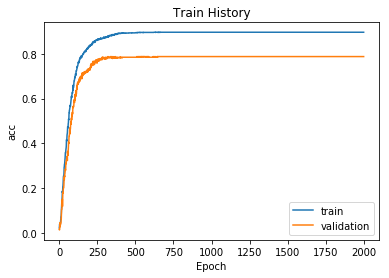

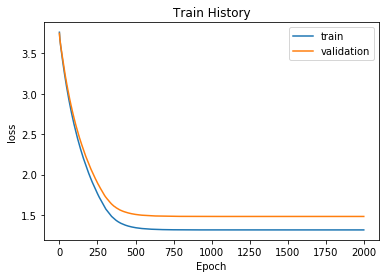

In [67]:
show_train_history(train_history, 'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [68]:
scores = model.evaluate(X_test, Y_test)

429/429 [==============================] - 0s 23us/step


In [69]:
scores[1] * 100

75.75757581315118

### Before saving: are you sure?

In [86]:
model.save_weights("model_logistic.h5")
#for this
#https://machinelearningmastery.com/save-load-keras-deep-learning-models/

## MUST-SEE: 
* https://www.kaggle.com/randyrose2017/for-beginners-using-keras-to-build-models
* https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d
* https://medium.com/cracking-the-data-science-interview/a-gentle-introduction-to-neural-networks-for-machine-learning-d5f3f8987786
## Just liked:
* https://missinglink.ai/guides/neural-network-concepts/classification-neural-networks-neural-network-right-choice/
## Full-house:
https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464

### 3.3 Question

* Why rerunning with same configuration gives different output?

# 4. Performance Metrics:

In [114]:
import h5py

In [117]:
model_load = Sequential()
model_load.add(Dense(units = 10, 
                input_dim = 71, 
                activation = 'tanh',))
#model_load.add(Dense(units = 10, 
                #activation = 'tanh'))
model_load.add(Dense(units = 20, 
                activation = 'tanh'))
model_load.add(Dense(units = 42, 
                activation = 'softmax'))

In [118]:
model_load.load_weights('/home/amanzhol/Documents/Capstone/MAIN Work/models/model_10_10_20_tanh_100_1000_50.h5')

Why do I need to compile before evaluating?

In [120]:
model_load.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [122]:
evaluation = model_load.evaluate(X_test, Y_test)

429/429 [==============================] - 0s 34us/step


In [123]:
evaluation[1] * 100

81.35198137976907

### State-of-the-art on this dataset (accuarcy)

Results of Ms. Asma Salem

<img src='AsmaSalemResults.png'>

In [129]:
#model prediction
predictions = model_load.predict(X_test)

In [83]:
predictions = model.predict(X_test)

In [84]:
Y_pred = (predictions > 0.5)

In [85]:
Y_pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [86]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 4.1 Confusion Matrix

Implementing confustion matrix from source:
https://stackoverflow.com/questions/50920908/get-confusion-matrix-from-a-keras-multiclass-model

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

array([[6, 0, 0, ..., 0, 0, 0],
       [0, 9, 0, ..., 0, 0, 0],
       [0, 0, 7, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 7, 0, 0],
       [2, 0, 0, ..., 0, 9, 0],
       [0, 0, 0, ..., 0, 0, 7]])

In [89]:
confusion = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

### 4.2 FAR, FRR and EER

Source: https://stats.stackexchange.com/questions/272962/are-far-and-frr-the-same-as-fpr-and-fnr-respectively

In [90]:
type(confusion)

numpy.ndarray

In [91]:
confusion.shape

(42, 42)

<img src='ConfusionMatrix.png'>

<img src='PerformanceMetrics.png'>

> Edit:
this is the format for confusion_matrix():
[[TP,FN]
[FP,TN]]
And classification report gives all this

In [92]:
confusion[0].shape

(42,)

In [93]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [101]:
Y_test.shape

(429, 42)

In [102]:
Y_pred.shape

(429, 42)

In [104]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [100]:
perf_measure(Y_test, Y_pred)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [96]:
#Thus
TP = 6
FP = 1
TN = 11
FN = 67

In [97]:
def FAR(FP, TN):
    return FP/(FP + TN)

def FRR(FN, TP):
    return FN/(FN + TP)

In [98]:
FAR(FP, TN) * 100

8.333333333333332

In [99]:
FRR(FN, TP) * 100

91.78082191780823

### State-of-the-art on this dataset (Performance Metrics)

Ms. Asma Results
* FAR = 0.3%
* FRR = 1.5%
* EER = 0.9%

### Questions
* How to have several FAR, FRR?

### To read for Confusion Matrix - Get Items FP/FN/TP/TN - Python
* https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python
* https://classeval.wordpress.com/introduction/basic-evaluation-measures/